## 实验题目3 四阶龙格-库塔(Runge-Kutta)方法

本实验除了完成Runge-Kutta方法的编写外，还充分学习了微分方程求解库，隐函数求解等等的用法，便利了日后的使用，也在编写代码中巩固了理论知识。

### 实验介绍

### 问题定义

### 数学原理

### 代码实现

首先导入需要的包。

`DifferentialEquations.jl`是用于求解微分方程的标准库，本例中用于获取`lib solver`所需的数值解；

`ImplicitEquations.jl`是用于支持隐函数的标准库，本例中仅在`Test 1 - Simple`部分用于支持绘制隐函数图像。

In [1]:
using DifferentialEquations
using Plots
using LaTeXStrings
using Statistics
using ImplicitEquations
using PrettyTables

根据数学原理和代码流程，可以很容易写出如下代码：

In [2]:
function rungekutta(f::Function, xspan, y0, num)
    a, b = xspan
    x0 = a
    h = (b - a) / num
    xs, ys = zeros(num), zeros(num)
    for n = 1:num
        K1 = h * f(x0, y0)
        K2 = h * f(x0 + h / 2, y0 + K1 / 2)
        K3 = h * f(x0 + h / 2, y0 + K2 / 2)
        K4 = h * f(x0 + h, y0 + K3)
        x1 = x0 + h
        y1 = y0 + 1 / 6 * (K1 + 2K2 + 2K3 + K4)
        xs[n], ys[n] = x0, y0 = x1, y1
    end
    xs, ys
end

rungekutta (generic function with 1 method)

### 测试代码

这是一段从教材上选取的测试代码。

待求微分方程为$\frac{\mathrm{d} y}{\mathrm{d} x}=y-\frac{2x}{y}$，解析解为抛物线$y^2=2x+1$，编写的`rungekutta()`函数进行数值求解时只求解了$y>0$的情形。

除此以外，调用`DifferentialEquations.jl`库中经`ODEProblem()`返回类型重载了的`solve()`方法获得了更精确的数值解。

因本部分仅做测试用，运行过程未经过封装，略显零乱，但考虑到与本实验问题求解并无直接关联，故未作更多修改。

#### Test 1 - Simple

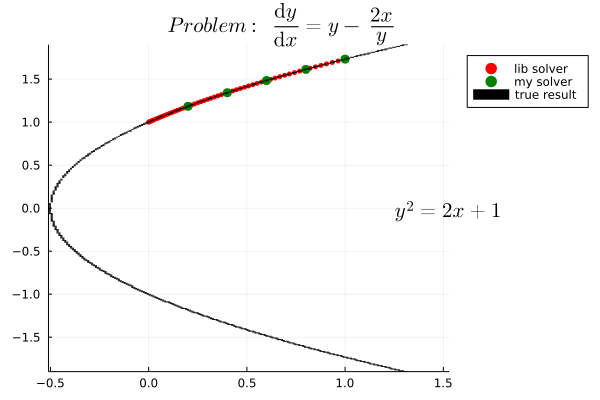

My Runge-Kutta Solver:
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │     1.18321596 │     1.18322929 │
│     0.40000000 │     1.34164079 │     1.34166693 │
│     0.60000000 │     1.48323970 │     1.48328146 │
│     0.80000000 │     1.61245155 │     1.61251404 │
│     1.00000000 │     1.73205081 │     1.73214188 │
└────────────────┴────────────────┴────────────────┘


In [3]:
f(y, p, x) = y - 2x / y
xspan = (0.0, 1.0)
y0 = 1.0
prob = ODEProblem(f, y0, xspan)
alg = RK4()
sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
plot(title=L"~~~~~~~~~~~~ Problem:\ \frac{\mathrm{d} y}{\mathrm{d} x}=y-\frac{2x}{y}")
plot!(sol.t, sol.u, seriestype=:scatter, markersize=3, msw=0, color=:red, label="lib solver")

f(x, y) = y - 2x / y
# xspan = (0.0, 1.0)
# y0 = 1.0
println("My Runge-Kutta Solver:")
num = convert(Integer, 1.0 / 0.2)
xs, ys = rungekutta(f, xspan, y0, 5)
yt = .√(2 .* xs .+1)
data = [xs yt ys]
header = (["x","True y", "Pred y"])
pretty_table(
    data;
    alignment=[:c, :c, :c],
    header=header,
    header_crayon=crayon"bold",
    # tf = tf_markdown,
    formatters=ft_printf("%14.8f"))
p = plot!(xs, ys, seriestype=:scatter, markersize=5, msw=0, color=:green, label="my solver")
# display(p)
f(x, y) = y^2 - 2x - 1
p = plot!(f ⩵ 0.0, color=:green, linewidth=0.1, label="true result")  # \Equal[Tab]
p = plot!(legend=:outertopright, xlim=(-0.51, 1.53), ylim=(-1.9, 1.9))
x = xlims(p)[2]
y = mean(ylims(p))
ymax = ylims(p)[2]
annotate!(x, y, L"y^2=2x+1", :black)
display(p)

### 实验题目

#### 执行代码

本部分代码用于将需要呈现的结果封装在一个`show_result()`函数中，作图时调用重载的三个作图函数`show_plot()`，分别绘制出`lib solver`，`my solver`和`true result`的图像，用于观察结果。在运行的循环中，打印出每次执行时的数据，以表格方式呈现。

在本部分之后，是各个问题的逐一求解过程，因题目本身不带更多条件，为标准的常微分方程初值问题求解，故仅按部就班完成了代码的编写和求解，以及结果展示。

为便于区分题目，所绘制的图像中给出了题目的微分方程和标准解的解析式，可供参考。考虑到图片整洁性的原因，略去对于x范围和初值的呈现，前者可直接从x轴范围看出，后者可从标准解的y坐标大致读出。

In [4]:
function show_plot(p, f::Function, tspan, u0::Float64, reltol, abstol, dense::Bool)
    prob = ODEProblem(f, u0, tspan)
    alg = RK4()
    sol = solve(prob, alg, reltol=1e-8, abstol=1e-8)
    if dense
        p = plot!(sol, seriestype=:scatter, markersize=1, msw=0, color=:red, label="lib solver")
    else
        p = plot!(sol.t, sol.u, seriestype=:scatter, markersize=2, msw=0, color=:red, label="lib solver")
    end
    p, sol
end
function show_plot(p, f::Function, xspan, y0::Float64, iternum::Integer)
    xs, ys = rungekutta(f, xspan, y0, iternum)
    p = plot!(xs, ys, seriestype=:scatter, markersize=4, msw=0, color=:green, label="my solver")
    p, xs, ys
end
function show_plot(p, f::Function, xs, show::Bool, text)
    x = xlims(p)[2]
    y = mean(ylims(p))
    annotate!(x, y, text, :black)
    if show
        p = plot!(f, color=:blue, label="true result")
    else
        p = plot!(f, color=:blue, label="true result")
    end
    p, xs, f.(xs)
end
function show_result(f1::Function, f2::Function, f3::Function, xspan, y0, iternums, show::Bool, dense::Bool, title, text)
    println("\n\n" * title)
    for iternum in iternums
        print("\nIternum: $iternum\n")
        p = plot(legend=:outertopright, title=L"~~~~~~~~~~~~~~~~~~~~" * title)
        p, sol = show_plot(p, f1, xspan, y0, 1e-8, 1e-8, dense)
        p, xs, ys = show_plot(p, f2, xspan, y0, iternum)
        p, xt, yt = show_plot(p, f3, xs, show, text)
        data = [xt yt ys]
        header = (["x", "True y", "Pred y"])
        pretty_table(
            data;
            alignment=[:c, :c, :c],
            header=header,
            header_crayon=crayon"bold",
            # tf = tf_markdown,
            formatters=ft_printf("%14.8f"))
        display(p)
    end
end

show_result (generic function with 1 method)

#### 问题 1

##### 1.1

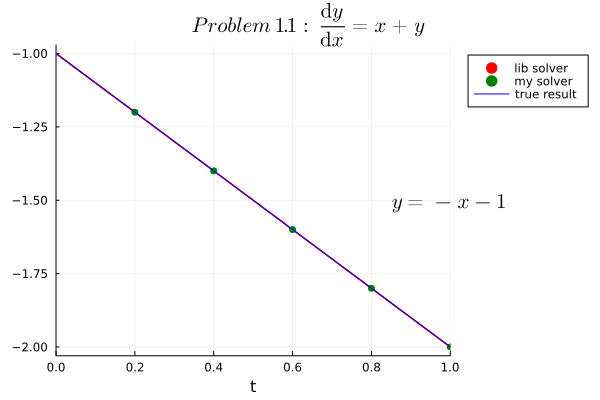

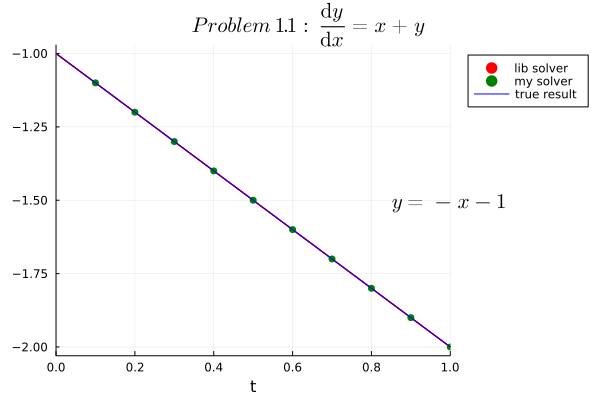

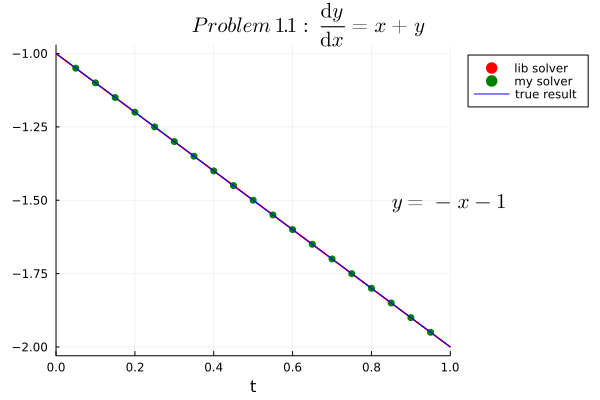



$Problem\ 1.1: \frac{\mathrm{d} y}{\mathrm{d} x} = x + y$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │    -1.20000000 │    -1.20000000 │
│     0.40000000 │    -1.40000000 │    -1.40000000 │
│     0.60000000 │    -1.60000000 │    -1.60000000 │
│     0.80000000 │    -1.80000000 │    -1.80000000 │
│     1.00000000 │    -2.00000000 │    -2.00000000 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.10000000 │    -1.10000000 │    -1.10000000 │
│     0.20000000 │    -1.20000000 │    -1.20000000 │
│     0.30000000 │    -1.30000000 │    -1.30000000 │
│     0.40000000 │    -1.40000000 │    -1.40000000 │
│     0.50000000 │    -1.50000000 │    -1.50000000 │
│     0.600000

In [5]:
iternums = [5, 10, 20]

f1(y, p, x) = x + y    # lib RK4() solver
xspan = (0.0, 1.0)
y0 = -1.0
f2(x, y) = x + y       # my rungekutta() solver
f3(x) = -x - 1         # true result 
title = L"Problem\ 1.1: \frac{\mathrm{d} y}{\mathrm{d} x} = x + y"
text = L"y = -x - 1"
show_result(f1, f2, f3, xspan, y0, iternums, true, true, title, text) # show=true, dense=true

##### 1.2

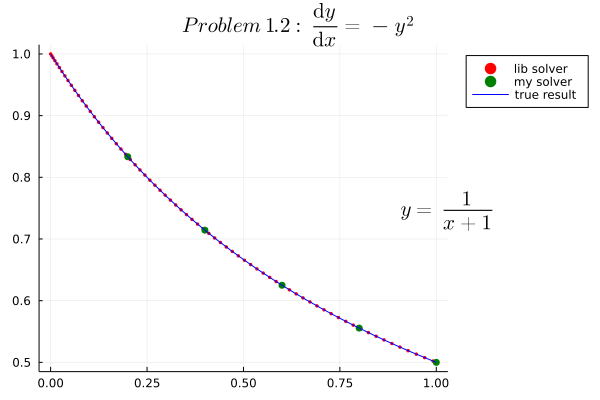

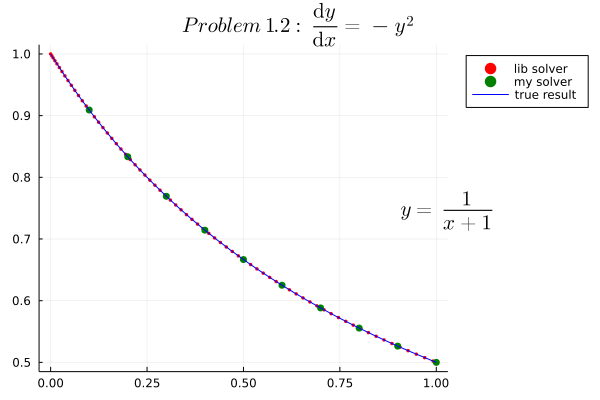

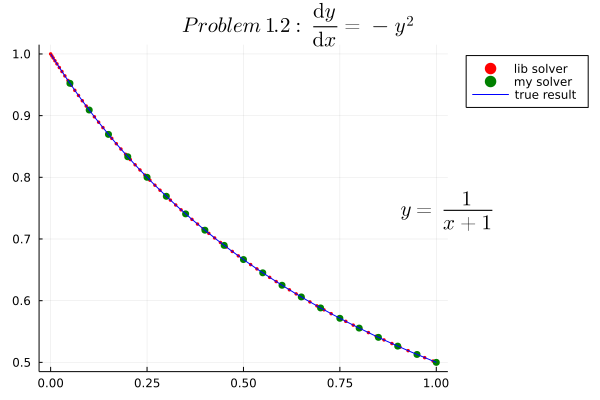



$Problem\ 1.2: \frac{\mathrm{d} y}{\mathrm{d} x} = -y^2$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │     0.83333333 │     0.83333904 │
│     0.40000000 │     0.71428571 │     0.71429213 │
│     0.60000000 │     0.62500000 │     0.62500589 │
│     0.80000000 │     0.55555556 │     0.55556069 │
│     1.00000000 │     0.50000000 │     0.50000441 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.10000000 │     0.90909091 │     0.90909119 │
│     0.20000000 │     0.83333333 │     0.83333373 │
│     0.30000000 │     0.76923077 │     0.76923121 │
│     0.40000000 │     0.71428571 │     0.71428615 │
│     0.50000000 │     0.66666667 │     0.66666709 │
│     0.6000000

In [6]:
iternums = [5, 10, 20]

f1(y, p, x) = -y^2
xspan = (0.0, 1.0)
y0 = 1.0
f2(x, y) = -y^2
f3(x) = 1 / (x + 1)
title = L"Problem\ 1.2: \frac{\mathrm{d} y}{\mathrm{d} x} = -y^2"
text = L"y = \frac{1}{x + 1}"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title, text) # show=true, dense=true

#### 问题 2

##### 2.1

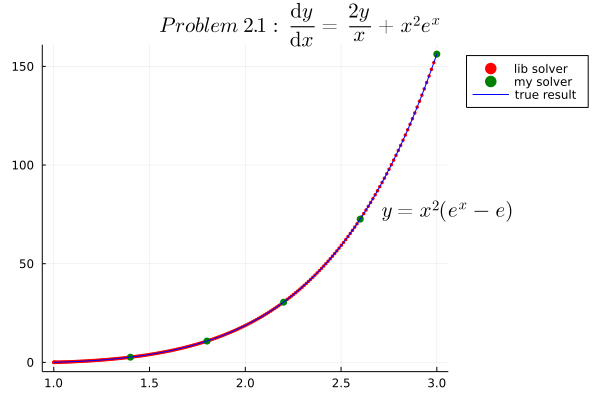

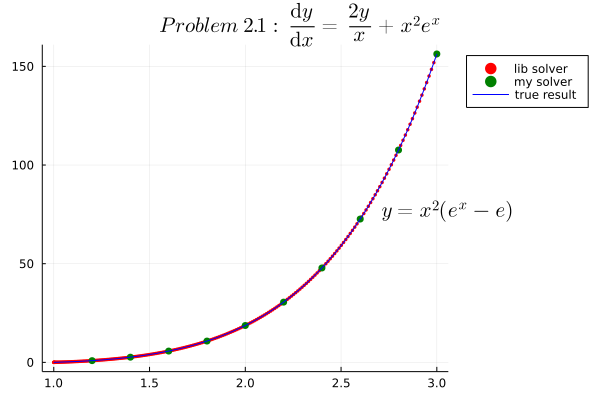

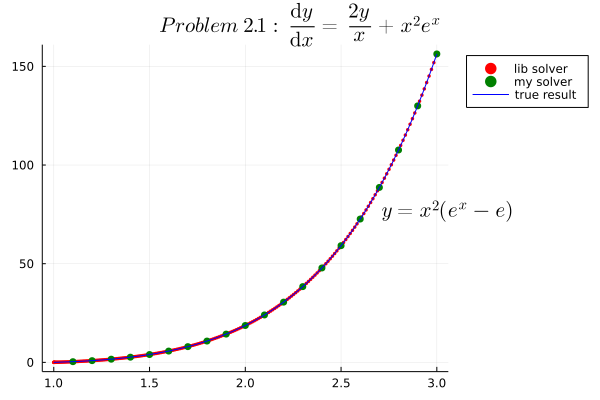



$Problem\ 2.1:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{2y}{x}+x^2 e^x$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     1.40000000 │     2.62035955 │     2.61394279 │
│     1.80000000 │    10.79362466 │    10.77631317 │
│     2.20000000 │    30.52458129 │    30.49165420 │
│     2.60000000 │    72.63928396 │    72.58559861 │
│     3.00000000 │   156.30529585 │   156.22519828 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     1.20000000 │     0.86664254 │     0.86637911 │
│     1.40000000 │     2.62035955 │     2.61974052 │
│     1.60000000 │     5.72096153 │     5.71989528 │
│     1.80000000 │    10.79362466 │    10.79201760 │
│     2.00000000 │    18.68309708 │    18.68085236 │
│ 

In [7]:
iternums = [5, 10, 20]

f1(y, p, x) = 2 * y / x + x^2 * exp(x)
xspan = (1.0, 3.0)
y0 = 0.0
f2(x, y) = 2 * y / x + x^2 * exp(x)
f3(x) = x^2 * (exp(x) - exp(1))
title = L"Problem\ 2.1:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{2y}{x}+x^2 e^x"
text = L"y=x^2(e^x - e)"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title, text) # show=true, dense=true

##### 2.2

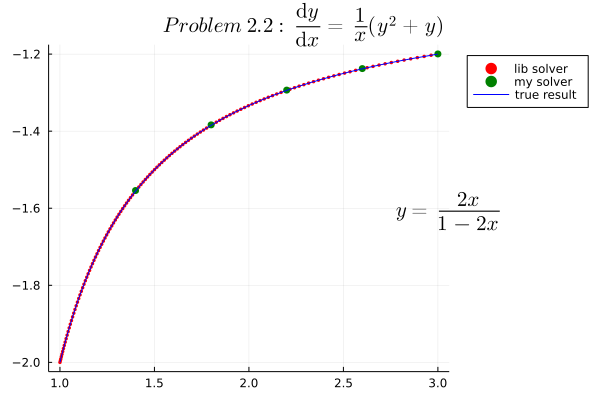

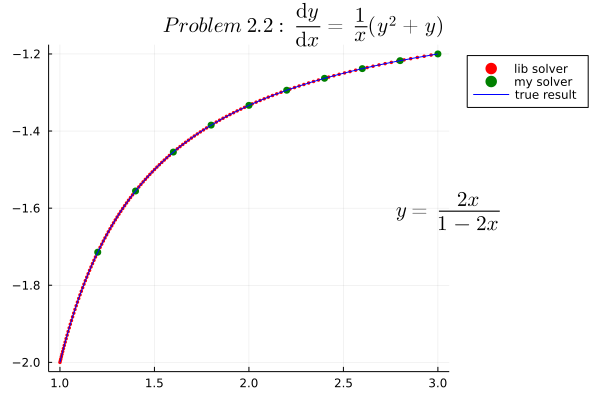

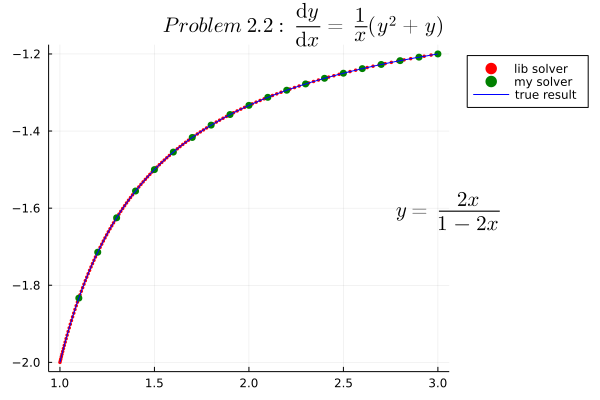



$Problem\ 2.2:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{1}{x}(y^2+y)$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     1.40000000 │    -1.55555556 │    -1.55398900 │
│     1.80000000 │    -1.38461538 │    -1.38361729 │
│     2.20000000 │    -1.29411765 │    -1.29340153 │
│     2.60000000 │    -1.23809524 │    -1.23754016 │
│     3.00000000 │    -1.20000000 │    -1.19954796 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     1.20000000 │    -1.71428571 │    -1.71424518 │
│     1.40000000 │    -1.55555556 │    -1.55552288 │
│     1.60000000 │    -1.45454545 │    -1.45451975 │
│     1.80000000 │    -1.38461538 │    -1.38459451 │
│     2.00000000 │    -1.33333333 │    -1.33331586 │
│   

In [8]:
iternums = [5, 10, 20]

f1(y, p, x) = (y^2 + y) / x
xspan = (1.0, 3.0)
y0 = -2.0
f2(x, y) = (y^2 + y) / x
f3(x) = 2x / (1 - 2x)
title = L"Problem\ 2.2:\frac{\mathrm{d} y}{\mathrm{d} x}=\frac{1}{x}(y^2+y)"
text = L"y=\frac{2x}{1-2x}"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title, text) # show=true, dense=true

#### 问题 3

##### 3.1

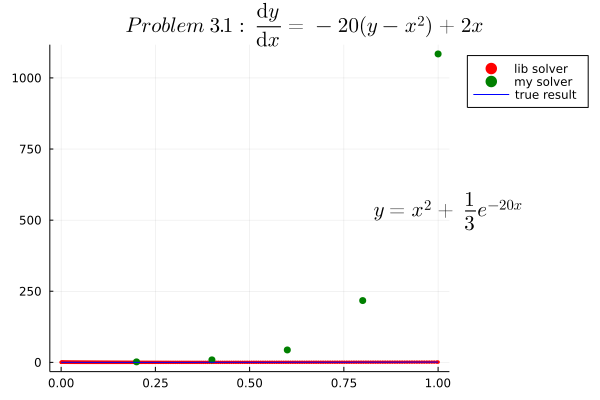

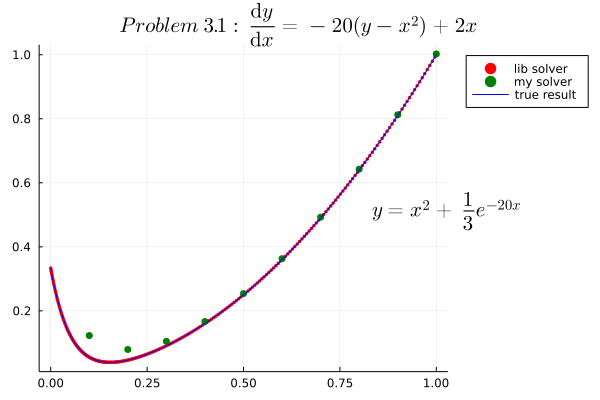

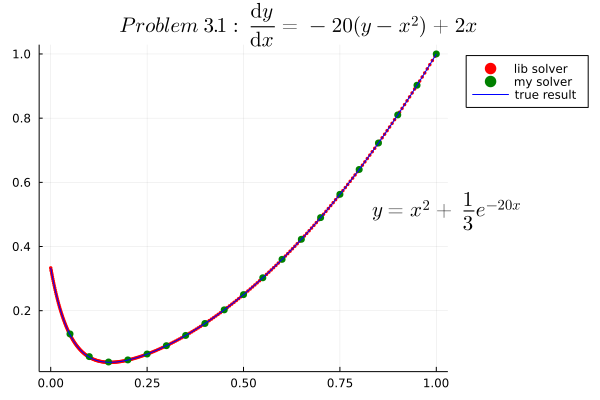



$Problem\ 3.1: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-x^2)+2x$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │     0.04610521 │     1.76000000 │
│     0.40000000 │     0.16011182 │     8.81333333 │
│     0.60000000 │     0.36000205 │    43.68000000 │
│     0.80000000 │     0.64000004 │   217.29333333 │
│     1.00000000 │     1.00000000 │  1084.32000000 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.10000000 │     0.05511176 │     0.12277778 │
│     0.20000000 │     0.04610521 │     0.07925926 │
│     0.30000000 │     0.09082625 │     0.10475309 │
│     0.40000000 │     0.16011182 │     0.16658436 │
│     0.50000000 │     0.25001513 │     0.25386145 │
│     0.

In [9]:
iternums = [5, 10, 20]

f1(y, p, x) = -20(y - x^2) + 2x
xspan = (0.0, 1.0)
y0 = 1 / 3
f2(x, y) = -20(y - x^2) + 2x
f3(x) = x^2 + 1 / 3 * exp(-20x)
title = L"Problem\ 3.1: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-x^2)+2x"
text = L"y=x^2+\frac{1}{3}e^{-20x}"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title, text) # show=true, dense=true

##### 3.2

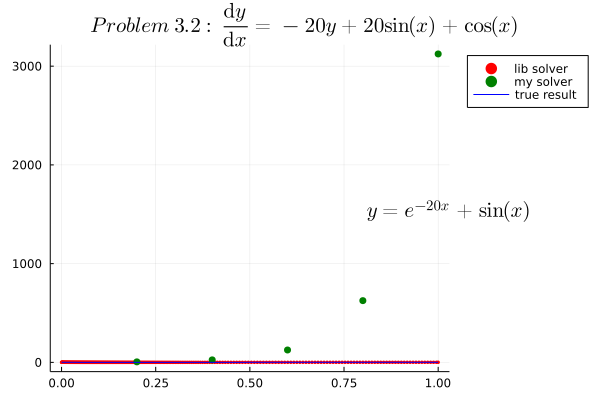

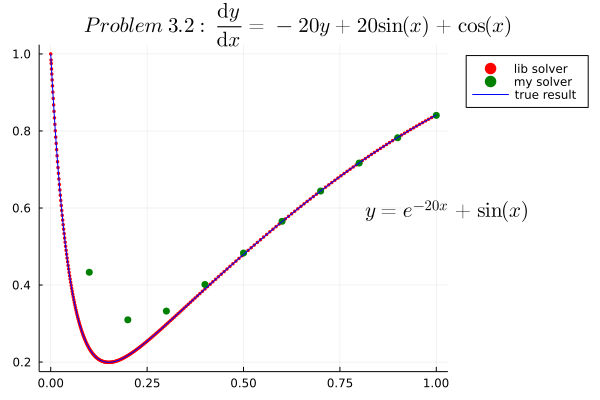

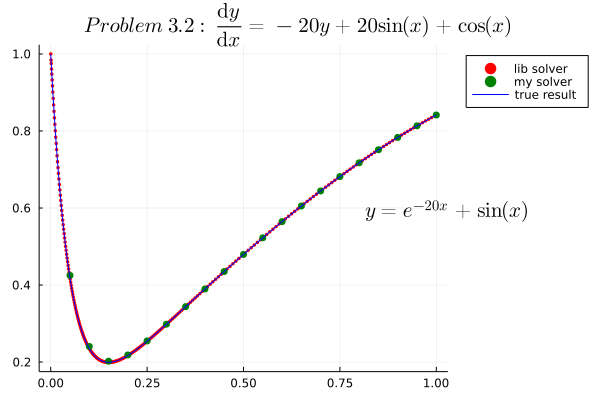



$Problem\ 3.2: \frac{\mathrm{d} y}{\mathrm{d} x}=-20y+20\sin(x)+\cos(x)$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │     0.21698497 │     5.19733811 │
│     0.40000000 │     0.38975380 │    25.37617070 │
│     0.60000000 │     0.56464862 │   125.48681526 │
│     0.80000000 │     0.71735620 │   625.31209552 │
│     1.00000000 │     0.84147099 │  3123.79515095 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.10000000 │     0.23516870 │     0.43313900 │
│     0.20000000 │     0.21698497 │     0.30966047 │
│     0.30000000 │     0.29799896 │     0.33232467 │
│     0.40000000 │     0.38975380 │     0.40141397 │
│     0.50000000 │     0.47947094 │     0.48307434 │

In [10]:
iternums = [5, 10, 20]

f1(y, p, x) = -20y + 20sin(x) + cos(x)
xspan = (0.0, 1.0)
y0 = 1.0
f2(x, y) = -20y + 20sin(x) + cos(x)
f3(x) = exp(-20x) + sin(x)
title = L"Problem\ 3.2: \frac{\mathrm{d} y}{\mathrm{d} x}=-20y+20\sin(x)+\cos(x)"
text =  L"y=e^{-20x}+\sin(x)"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title ,text) # show=true, dense=true

##### 3.3

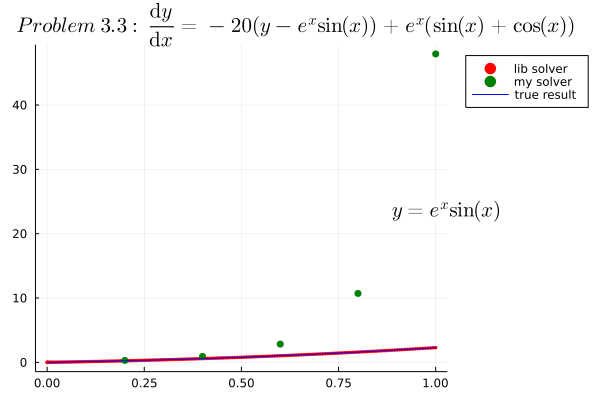

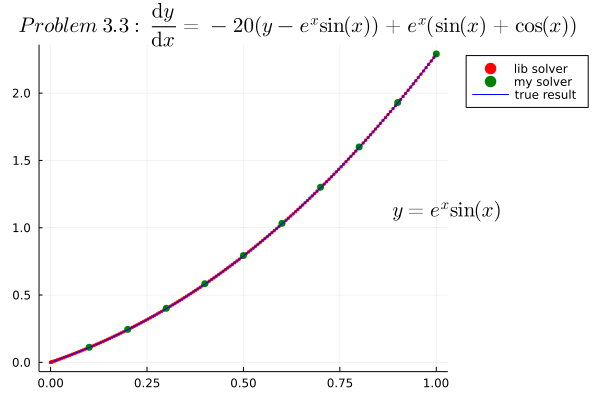

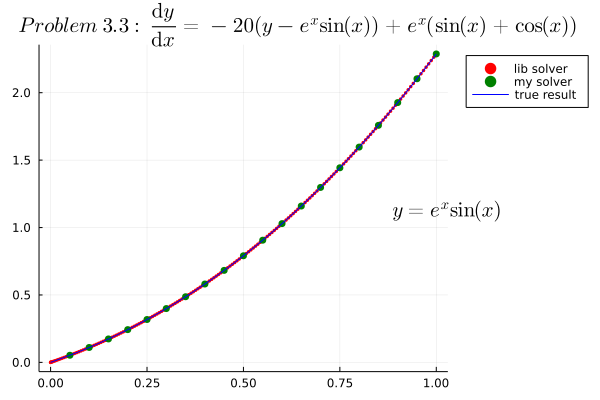



$Problem\ 3.3: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-e^x \sin(x))+e^x (\sin(x) + \cos(x))$

Iternum: 5
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.20000000 │     0.24265527 │     0.29864621 │
│     0.40000000 │     0.58094390 │     0.92721987 │
│     0.60000000 │     1.02884567 │     2.83547734 │
│     0.80000000 │     1.59650534 │    10.71088533 │
│     1.00000000 │     2.28735529 │    47.94144638 │
└────────────────┴────────────────┴────────────────┘

Iternum: 10
┌────────────────┬────────────────┬────────────────┐
│       x        │     True y     │     Pred y     │
├────────────────┼────────────────┼────────────────┤
│     0.10000000 │     0.11033299 │     0.11205511 │
│     0.20000000 │     0.24265527 │     0.24511651 │
│     0.30000000 │     0.39891055 │     0.40177810 │
│     0.40000000 │     0.58094390 │     0.58409696 │
│     0.50000000 │     0.7904390

In [11]:
iternums = [5, 10, 20]

f1(y, p, x) = -20(y - exp(x)sin(x)) + exp(x) * (sin(x) + cos(x))
xspan = (0.0, 1.0)
y0 = 0.0
f2(x, y) = -20(y - exp(x)sin(x)) + exp(x) * (sin(x) + cos(x))
f3(x) = exp(x) * sin(x)
title = L"Problem\ 3.3: \frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-e^x \sin(x))+e^x (\sin(x) + \cos(x))"
text = L"y=e^x \sin(x)"
show_result(f1, f2, f3, xspan, y0, iternums, true, false, title, text) # show=true, dense=true

### 思考题


1. 对实验 1，数值解和解析解相同吗？为什么？试加以说明。
   
   对于问题1.1，数值解和解析解是相同的，因为本题的解是线性函数，能够通过所得数值解的两个点确定直线的方程，即等价于得到了解析解。
   
   本例中，待求解微分方程为$\frac{\mathrm{d} y}{\mathrm{d} x} = x + y$，解为$y = -x - 1$，而`rungekutta()`函数求解的任意两点（如`(0.2,-1.2)`, `(1.0,-2.0)`）所决定的直线方程即为$y = -x - 1$。
    
   而对于问题1.2，虽然数值解和解析解之间差异已经极小（绝对误差在1e-7~1e-5数量级，仅仅对比相同x所在的y取值，如下表所示），但对于非线性函数$y=\frac{1}{1+x}$，在未知函数解析式类型的情况下，是几乎不可能仅仅通过数值解所求得的点，来推断准确的函数解析式的，此时不能认为所求得的数值解就是解析解。
   ```
   ┌────────────────┬────────────────┬────────────────┬────────────────┬────────────────┐
   │     Test x     │     True y     │ 5-Iter Pred y  │ 10-Iter Pred y │ 20-Iter Pred y │
   ├────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
   │     0.20000000 │     0.83333333 │     0.83333904 │     0.83333373 │     0.83333336 │
   │     0.40000000 │     0.71428571 │     0.71429213 │     0.71428615 │     0.71428574 │
   │     0.60000000 │     0.62500000 │     0.62500589 │     0.62500040 │     0.62500003 │
   │     0.80000000 │     0.55555556 │     0.55556069 │     0.55555590 │     0.55555558 │
   │     1.00000000 │     0.50000000 │     0.50000441 │     0.50000030 │     0.50000002 │
   └────────────────┴────────────────┴────────────────┴────────────────┴────────────────┘
   ```

2. 对实验 2，N 越大越精确吗？试加以说明。
   
   虽然确实N越大越精确，但从本例实验的结果来看，因为当n=5的时候已经获得足够精确的数值解了，再增大n的值只是增加了计算量，却不能再明显提高结果的精度，此时我们不能一味的增大N，而要根据所需要达到的精度要求及时终止计算。
   
   本例中，$y=x^2(e^x - e)$，在迭代次数从5增加到20的时候，数值上的精度只增加了2位，继续增大n对于所求数值解精度改变很小，很难继续使用Runge-Kutta方法继续进行求解，并且这样的计算资源成本是不可忽略的。
   ```
   ┌────────────────┬────────────────┬────────────────┬────────────────┬────────────────┐
   │     Test x     │     True y     │ 5-Iter Pred y  │ 10-Iter Pred y │ 20-Iter Pred y │
   ├────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
   │     1.40000000 │     2.62035955 │     2.61394279 │     2.61974052 │     2.62031131 │
   │     1.80000000 │    10.79362466 │    10.77631317 │    10.79201760 │    10.79350178 │
   │     2.20000000 │    30.52458129 │    30.49165420 │    30.52159814 │    30.52435589 │
   │     2.60000000 │    72.63928396 │    72.58559861 │    72.63450354 │    72.63892578 │
   │     3.00000000 │   156.30529585 │   156.22519828 │   156.29825744 │   156.30477188 │
   └────────────────┴────────────────┴────────────────┴────────────────┴────────────────┘
   ```
   
3. 对实验 3，N 较小会出现什么现象？试加以说明
 
   当n较小的时候所得数值解和正确结果相差较大，结果失真，说明在一定条件下确实需要更大的n来更好的获得数值解。而具体这个n的大小如何选取则取决于待求解微分方程性质，这里应该涉及到更深入的课程或者研究。

   对本例而言，从下表以及所绘制的图像都很容易能看到，当n较小的时候会导致求得数值解偏差极大，甚至于几乎就完全是错误的（大约与正确结果相差1e3的量级），所以选择充分大的n，并设置结果收敛的措施，才能确保最终可以得到精度合适的数值解的同时不会造成太大的计算资源浪费。
   
   下表为了便于对齐，略去了多余的x数据，方程的解析解为$y=e^{-20x}+\sin(x)$，数值解如下所示：
   ```
   ┌────────────────┬────────────────┬────────────────┬────────────────┬────────────────┐
   │       x        │     True y     │ 5-Iter Pred y  │ 10-Iter Pred y │ 20-Iter Pred y │
   ├────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
   │     0.20000000 │     0.04610521 │     1.76000000 │     0.07925926 │     0.04667348 │
   │     0.40000000 │     0.16011182 │     8.81333333 │     0.16658436 │     0.16021366 │
   │     0.60000000 │     0.36000205 │    43.68000000 │     0.36295382 │     0.36008591 │
   │     0.80000000 │     0.64000004 │   217.29333333 │     0.64255042 │     0.64008338 │
   │     1.00000000 │     1.00000000 │  1084.32000000 │     1.00250560 │     1.00008333 │
   └────────────────┴────────────────┴────────────────┴────────────────┴────────────────┘
   ```
   以下为方程$\frac{\mathrm{d} y}{\mathrm{d} x}=-20(y-e^x \sin(x))+e^x (\sin(x) + \cos(x))$的部分数值解表格，为便于集中观察而总结如下，解析解为$y=e^x \sin(x)$，

   ```
   ┌────────────────┬────────────────┬────────────────┬────────────────┬────────────────┐
   │       x        │     True y     │ 5-Iter Pred y  │ 10-Iter Pred y │ 20-Iter Pred y │
   ├────────────────┼────────────────┼────────────────┼────────────────┼────────────────┤
   │     0.20000000 │     0.24265527 │     0.29864621 │     0.24511651 │     0.24274900 │
   │     0.40000000 │     0.58094390 │     0.92721987 │     0.58409696 │     0.58105449 │
   │     0.60000000 │     1.02884567 │     2.83547734 │     1.03241831 │     1.02896834 │
   │     0.80000000 │     1.59650534 │    10.71088533 │     1.60032101 │     1.59663402 │
   │     1.00000000 │     2.28735529 │    47.94144638 │     2.29115692 │     2.28748035 │
   └────────────────┴────────────────┴────────────────┴────────────────┴────────────────┘
   ```
   

### 参考资料

1. julia ordinary differential equations tutorial https://diffeq.sciml.ai/stable/tutorials/ode_example/

2. intro to solving differential equations in julia https://www.youtube.com/watch?v=KPEqYtEd-zY

3. julia ode solver type: Runge-Kutta https://diffeq.sciml.ai/stable/solvers/ode_solve/#Explicit-Runge-Kutta-Methods

4. julia ode problem type https://diffeq.sciml.ai/stable/types/ode_types/#ode_prob

5. julia ode speed up perf https://diffeq.sciml.ai/stable/features/performance_overloads/#performance_overloads

6. julia ode common solver option https://diffeq.sciml.ai/stable/basics/common_solver_opts/#solver_options